# Exercise: Derivatives

- by Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Load data

In [2]:
data = np.loadtxt("04b_Exercise_velocity_acceleration_data_file.dat")

In [3]:
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  15.25565932],
       [ 99.9       ,  15.33160759],
       [100.        ,  15.40808206]])

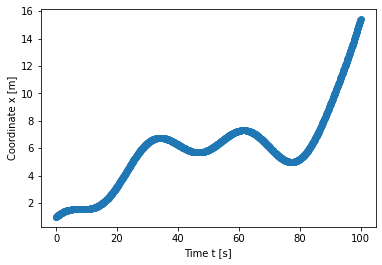

In [4]:
plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(data[:,0],data[:,1])

### Task

Calculate the velocity $$v(t)=\dot{x}(t)$$ and the acceleration $$a(t)=\ddot{x}(t)$$ for the loaded data set that describes a set of points $$(t_i,x_i)$$ for $$i=0,\dots,1000$$.

1. Calculate $$v_i$$ and $$a_i$$ using the forward-differences, central-differences and Richardson methods
2. Determine the maximum value of the acceleration and the corresponding time.

Be careful, now we do not know the function $$x(t)$$ but only its values for specific points. You have to define the functions for the derivativesa bit differently.

### Solution

In [5]:
data[:, 0]

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [19]:
def forward(data):
    derive = np.zeros(len(data[:, 1]))
    # for equidistant data
    # h = (data[1, 0] - data[0, 0])
    # velocity[: -1] = (data[1:, 1] - data[:-1, 1]) / h
    # general
    derive[:-1] = (data[1:, 1] - data[:-1, 1]) / (data[1:, 0] - data[:-1, 0])
    # Last value use backwards method (or just set to second-Last value)
    derive[-1] = (data[-1, 1] - data[-2, 1]) / (data[-1, 0] - data[-2, 0])
    return np.transpose([data[:, 0], derive])

In [22]:
velocityForward = forward(data)
accelerationForward = forward(forward(data))

In [23]:
def central(data):
    derive = np.zeros(len(data[:, 1]))
    derive[1:-1] = (data[2:,1] - data[:-2, 1]) / (data[2:, 0] - data[:-2, 0])
    # first value use forward method or just set to second value
    derive[0] = (data[1, 1] - data[0, 1]) / (data[1, 0] - data[0, 0])
    # last value
    derive[-1] = (data[-1, 1] - data[-2, 1]) / (data[-1, 0] - data[-2, 0])
    return np.transpose([data[:, 0], derive])
    

In [25]:
velocityCentral = central(data)
accelerationCentral = central(central(data))

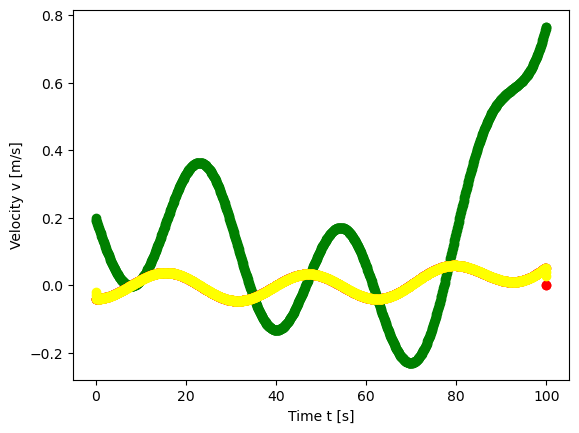

In [29]:
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')

plt.scatter(velocityForward[:, 0], velocityForward[:, 1], c='green')
plt.scatter(accelerationForward[:, 0], accelerationForward[:, 1], c='red')
plt.scatter(accelerationCentral[:, 0], accelerationCentral[:, 1], c='yellow')